In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("housing.csv")
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

In [55]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [56]:
data.info() # values missing in total bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [57]:
data.dropna(inplace=True) # drop nan entries

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_INLAND      20433 non-null  bool   
 10  ocean_proximity_ISLAND      20433 non-null  bool   
 11  ocean_proximity_NEAR BAY    20433 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(9)
memory usage:

In [59]:
# We need training and test data, some so the model has something to train on, and something else the model has never seen before to test itself on.

from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [60]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,True,False,False,False


In [61]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # Test size is the data that is left for testing after our model is finnished.

In [63]:
train_data = x_train.join(y_train) # After cutting off 20% of the data, now we have the other 80% to combine together

In [64]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
17194,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,False,False,False,True,348700.0
14629,-117.18,32.78,21.0,4185.0,1018.0,3122.0,993.0,3.0481,False,False,False,True,210000.0
12355,-116.54,33.80,22.0,6050.0,1387.0,1432.0,890.0,2.2216,True,False,False,False,183900.0
10928,-117.90,33.75,28.0,1346.0,291.0,1575.0,278.0,3.4250,False,False,False,False,159500.0
1788,-122.36,37.94,43.0,369.0,107.0,371.0,111.0,1.6000,False,False,True,False,79400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,-121.79,36.85,28.0,1049.0,235.0,705.0,208.0,2.7321,False,False,False,True,150000.0
2915,-119.06,35.36,9.0,1228.0,234.0,409.0,212.0,4.3482,True,False,False,False,95200.0
12710,-121.39,38.59,34.0,1151.0,234.0,563.0,251.0,2.8000,True,False,False,False,113600.0
8562,-118.41,33.92,38.0,1437.0,272.0,590.0,250.0,5.2338,False,False,False,False,358000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

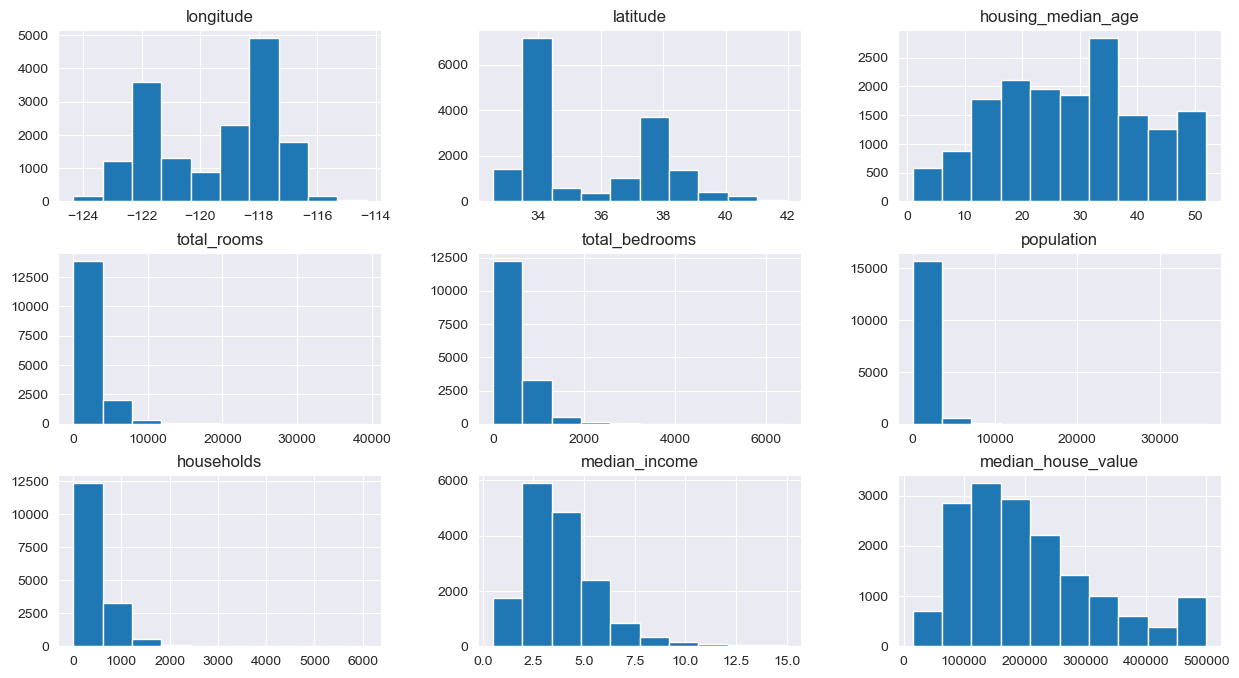

In [65]:
train_data.hist(figsize=(15, 8))

<Axes: >

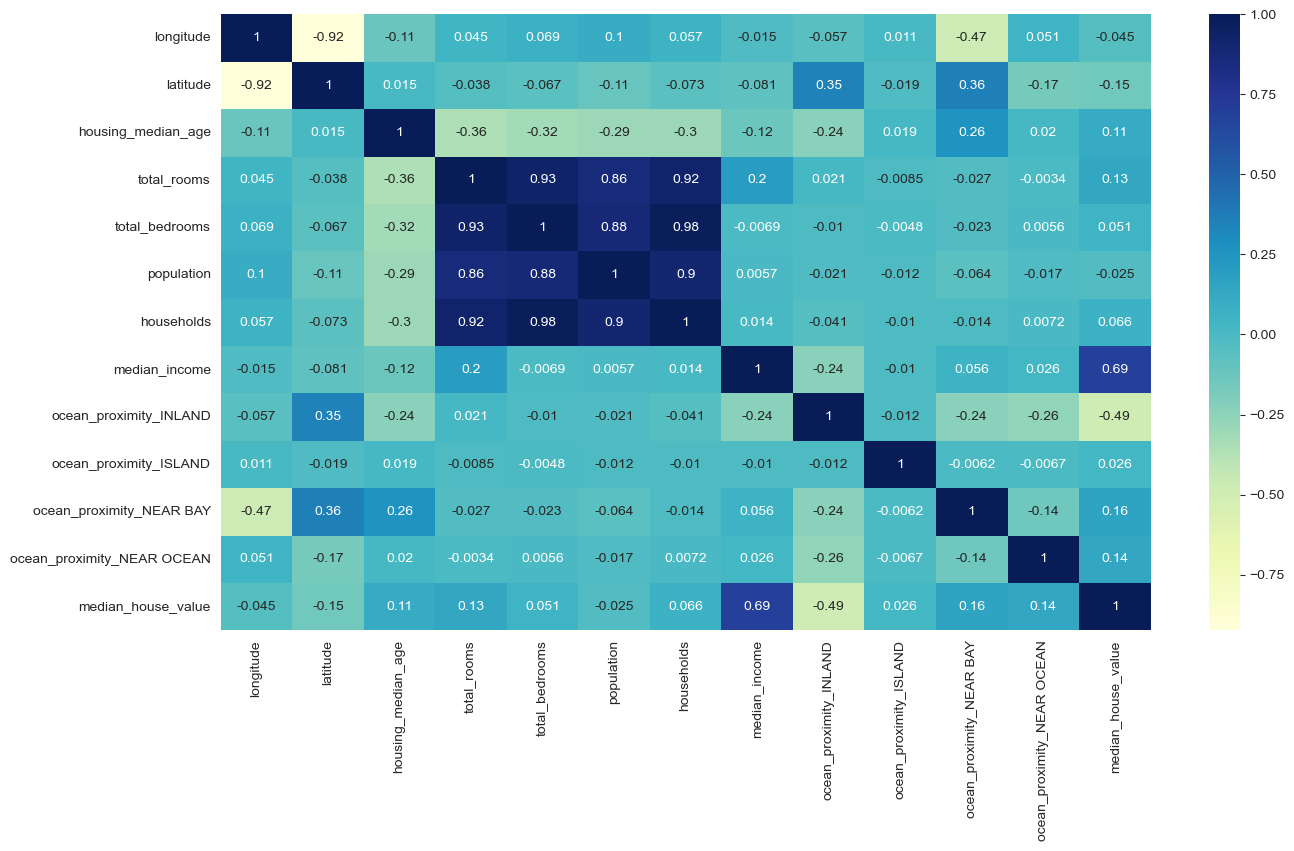

In [66]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [67]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

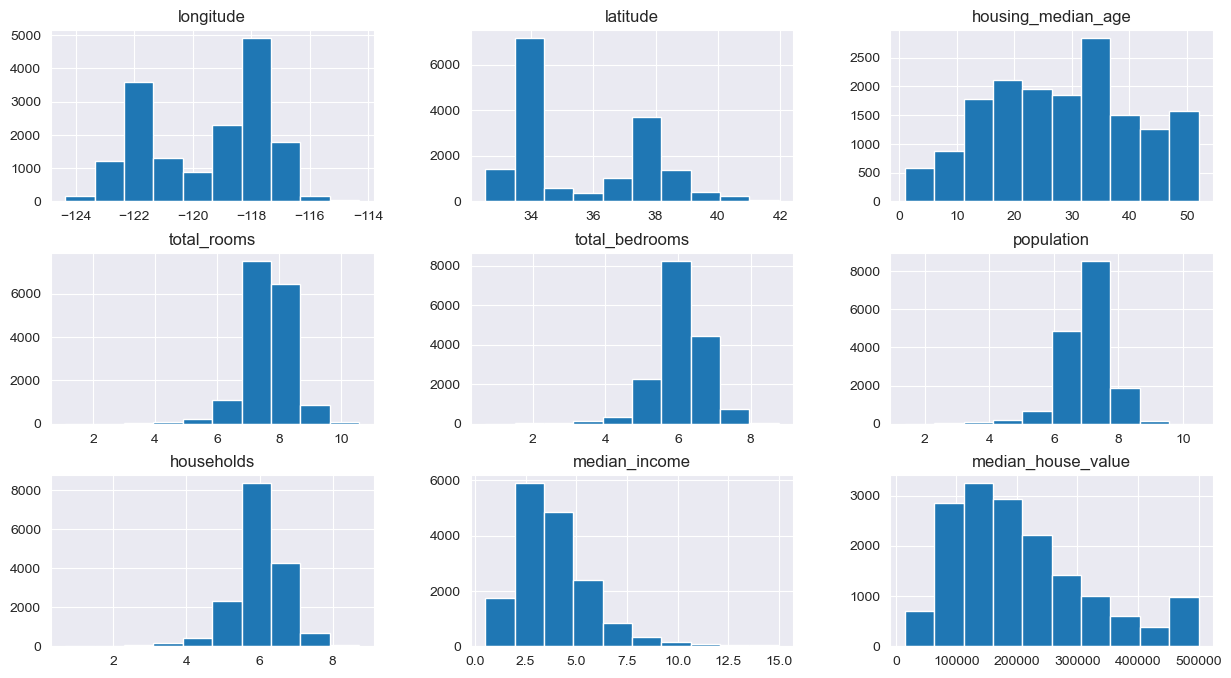

In [68]:
train_data.hist(figsize=(15, 8))

In [69]:
train_data.ocean_proximity_INLAND.value_counts()

ocean_proximity_INLAND
False    11169
True      5177
Name: count, dtype: int64

In [70]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
17194,-119.79,34.45,24.0,7.918265,6.073045,6.981935,5.942799,5.8635,False,False,False,True,348700.0
14629,-117.18,32.78,21.0,8.339501,6.926577,8.046549,6.901737,3.0481,False,False,False,True,210000.0
12355,-116.54,33.80,22.0,8.707979,7.235619,7.267525,6.792344,2.2216,True,False,False,False,183900.0
10928,-117.90,33.75,28.0,7.205635,5.676754,7.362645,5.631212,3.4250,False,False,False,False,159500.0
1788,-122.36,37.94,43.0,5.913503,4.682131,5.918894,4.718499,1.6000,False,False,True,False,79400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,-121.79,36.85,28.0,6.956545,5.463832,6.559615,5.342334,2.7321,False,False,False,True,150000.0
2915,-119.06,35.36,9.0,7.113956,5.459586,6.016157,5.361292,4.3482,True,False,False,False,95200.0
12710,-121.39,38.59,34.0,7.049255,5.459586,6.335054,5.529429,2.8000,True,False,False,False,113600.0
8562,-118.41,33.92,38.0,7.271009,5.609472,6.381816,5.525453,5.2338,False,False,False,False,358000.0


<Axes: >

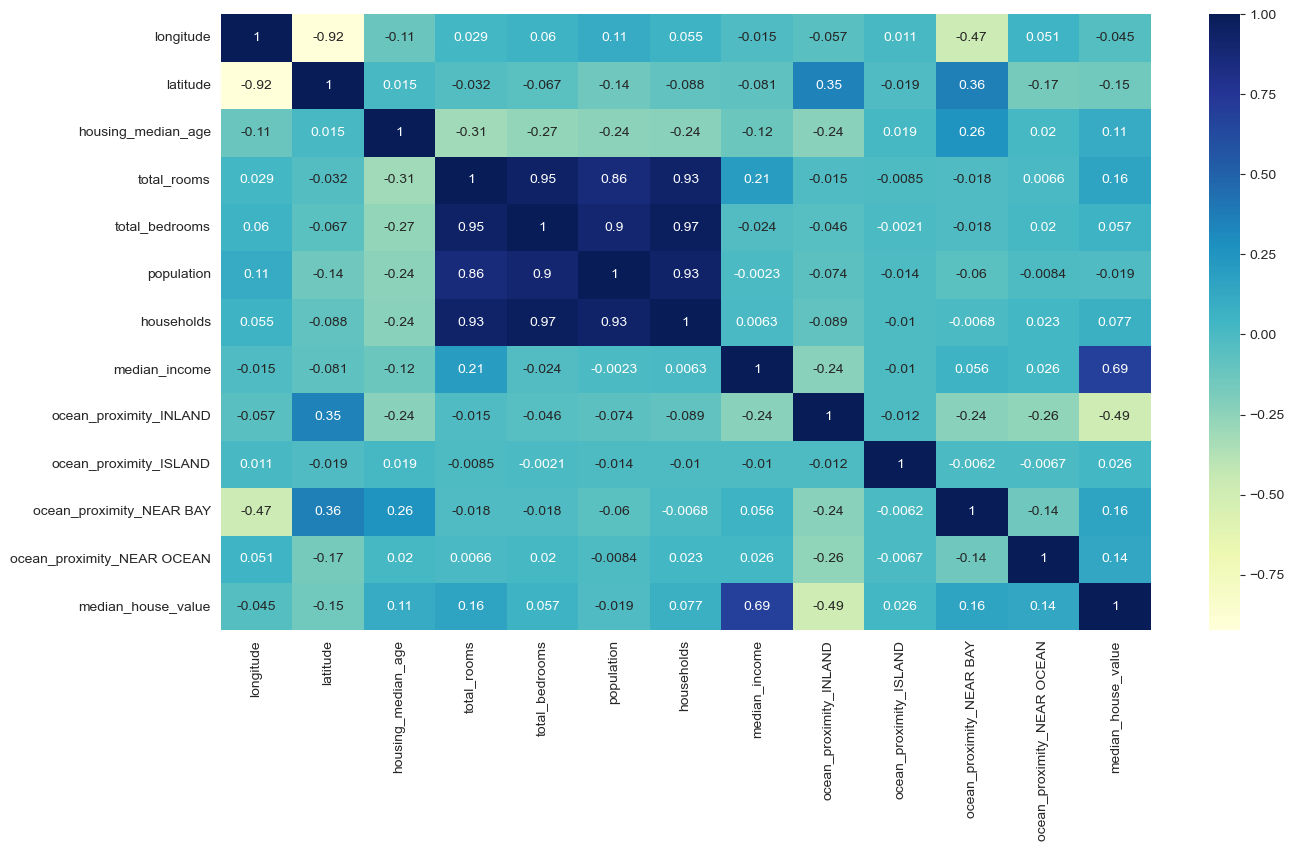

In [71]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

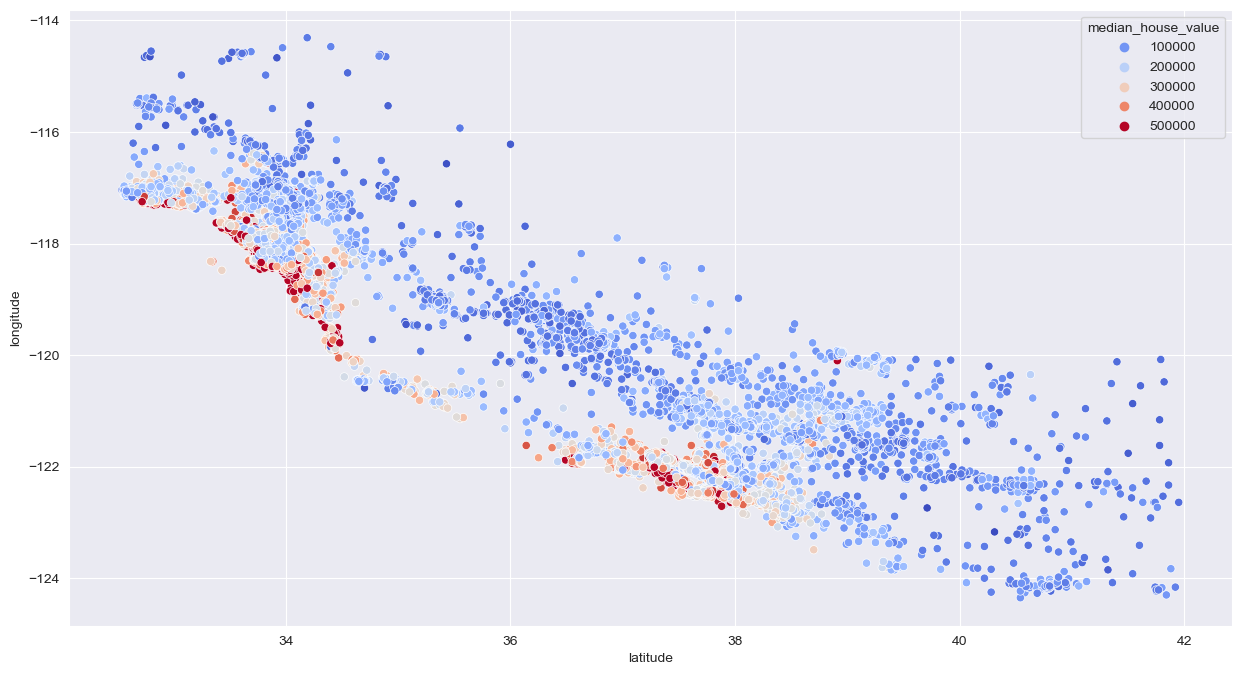

In [72]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm") # Visualisation of the coast. Houses closer to the coast are visibly more expensive.

In [73]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

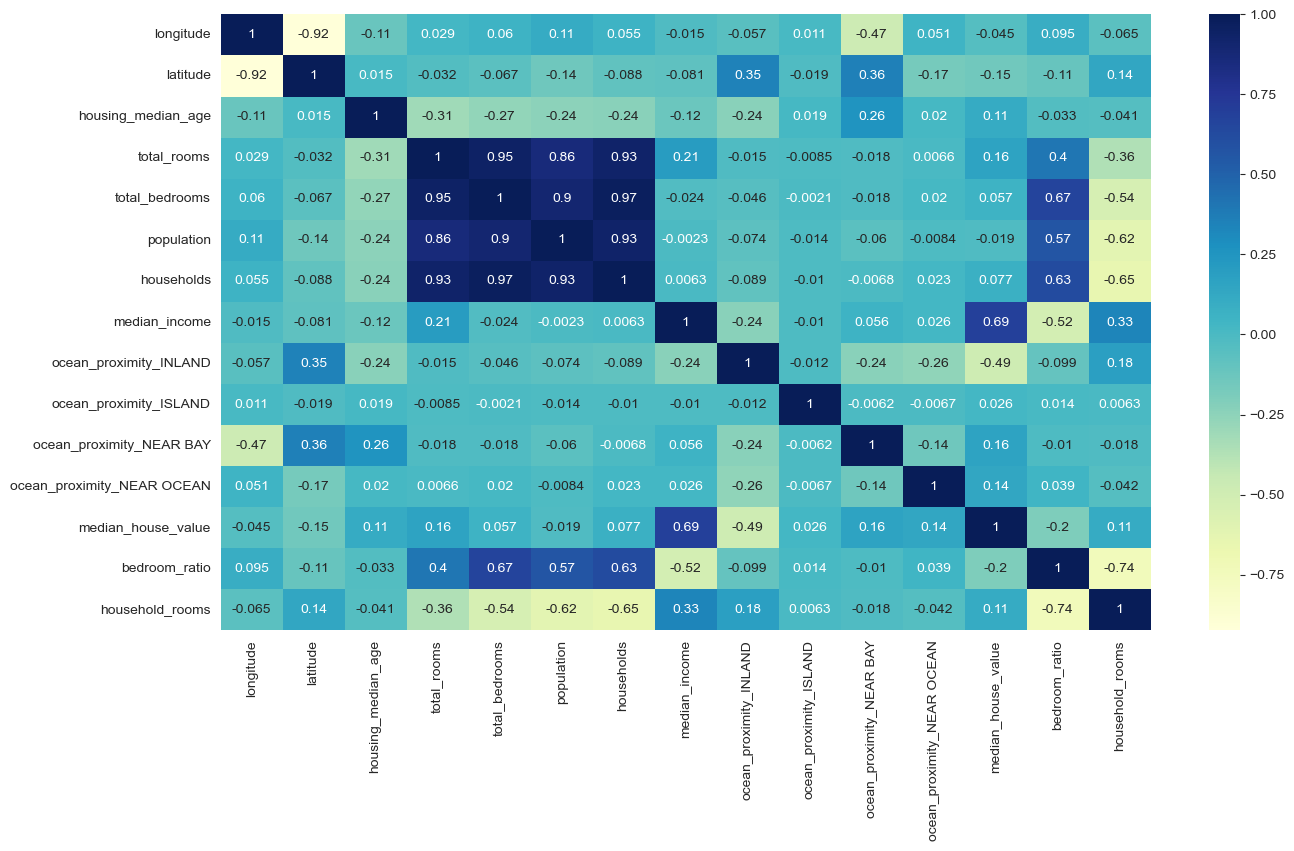

In [74]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [76]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [77]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [84]:
x_test_s = scaler.transform(x_test)

In [78]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
7296,-118.21,33.98,39.0,7.182352,5.726848,7.137278,5.700444,3.2788,False,False,False,False,0.797350,1.259964
11005,-117.79,33.77,23.0,8.187855,6.113682,7.164720,6.129050,8.5403,False,False,False,False,0.746677,1.335909
9480,-123.36,39.40,21.0,6.986566,5.541264,6.573680,5.620401,1.5625,False,False,False,False,0.793131,1.243073
2819,-119.04,35.41,25.0,7.363914,5.739793,6.739337,5.736572,3.0625,True,False,False,False,0.779449,1.283678
1490,-122.03,37.95,32.0,7.578657,5.749393,6.690842,5.762051,4.9485,False,False,True,False,0.758630,1.315271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,-124.14,40.60,27.0,7.046647,5.332719,6.257668,5.393628,4.0250,False,False,False,True,0.756774,1.306476
7592,-118.24,33.90,39.0,6.466145,4.867534,6.165418,4.820282,1.2083,False,False,False,False,0.752772,1.341445
589,-122.10,37.69,30.0,8.044305,6.439350,7.275865,6.343880,3.7222,False,False,True,False,0.800486,1.268042
6515,-118.04,34.07,39.0,7.804659,6.476972,7.838738,6.475433,2.3098,False,False,False,False,0.829885,1.205272


In [35]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
7734,-118.15,33.93,30.0,8.038189,6.444131,7.424762,6.376727,4.6583,False,False,False,False,207300.0
13471,-117.38,34.08,11.0,8.645586,7.038784,8.037866,6.944087,3.6875,True,False,False,False,112600.0
8812,-118.31,33.75,36.0,7.906915,6.163315,7.173192,6.126869,4.6042,False,False,False,True,357300.0
9018,-118.72,34.14,7.0,10.080252,8.391176,9.197660,8.297294,5.4032,False,False,False,True,318500.0
17244,-119.67,34.43,39.0,7.291656,5.945421,7.247793,5.926926,2.3681,False,False,False,False,241400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19374,-120.90,37.76,20.0,6.347389,4.727388,5.720312,4.691348,2.2024,True,False,False,False,156300.0
15939,-122.41,37.73,33.0,7.933797,6.342121,7.428333,6.315358,3.8643,False,False,True,False,276200.0
6081,-117.87,34.10,25.0,7.700295,6.169611,6.989335,6.052089,3.7750,False,False,False,False,191700.0
17211,-119.71,34.42,31.0,7.404888,6.214608,7.134094,6.214608,3.1563,False,False,False,False,267000.0


In [36]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,bedroom_ratio,household_rooms
7996,-118.15,33.86,32.0,7.875119,6.327937,6.975414,6.198479,2.4659,False,False,False,False,209000.0,0.803535,1.270492
18617,-122.04,37.04,17.0,8.512783,6.902743,7.594884,6.854355,3.8854,False,False,False,True,312300.0,0.810868,1.241953
8882,-118.51,34.04,40.0,7.232010,5.123964,6.182085,5.187386,11.7045,False,False,False,False,500001.0,0.708512,1.394153
7218,-118.16,34.03,40.0,7.697121,6.456770,7.894691,6.390241,2.3590,False,False,False,False,143400.0,0.838855,1.204512
14164,-117.06,32.77,34.0,7.456455,5.924256,6.594413,5.860786,2.0284,False,False,False,True,161800.0,0.794514,1.272262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,-120.76,38.73,17.0,6.240276,4.867534,5.752573,4.948760,1.5625,True,False,False,False,108300.0,0.780019,1.260978
10486,-117.68,33.48,15.0,7.488294,5.703782,6.590301,5.683580,5.0527,False,False,False,False,231400.0,0.761693,1.317531
18094,-122.06,37.34,13.0,7.629490,6.146329,6.673298,6.079933,5.0081,False,False,False,False,288300.0,0.805602,1.254864
16166,-122.50,37.78,46.0,7.881182,6.410175,7.257708,6.335054,3.7167,False,False,True,False,332800.0,0.813352,1.244059


In [86]:
reg.score(x_test_s, y_test)

0.6603983625902827

In [91]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [92]:
forest.score(x_test_s, y_test)

0.8178082078667063

In [99]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
best_forest = grid_search.best_estimator_

In [101]:
best_forest.score(x_test_s, y_test) 

0.821324238507453

In [ ]:
# it took 15 minutes just to be worse :(